In [3]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import pandas as pd
from functions.helpers import savitzky_golay
% matplotlib inline

## find solution for CARA utility function

In [115]:
expected_price = 80.0
risk_aversion = 3.0
expected_volatility = 0.02
current_stocks = 0.2

In [116]:
def optimal_current_price(price):
    price = abs(price)
    stocks = np.divide(np.log(expected_price / price), risk_aversion * expected_volatility * price) - current_stocks 
    return stocks

In [117]:
def optimal_stock_holdings(price):
    stocks = np.divide(np.log(expected_price / price), risk_aversion * expected_volatility * price)
    return stocks

In [118]:
float(scipy.optimize.broyden1(optimal_current_price, expected_price))

46.04110464287151

In [102]:
optimal_stock_holdings(80.0)

0.12670784628380136

In [91]:
optimal_current_price(80.0)

-19.8732921537162

In [ ]:
# the hfm knows its return and volatility
# the hfm calculates the price at which it wants to hold its current inventory



# Smooth volatility

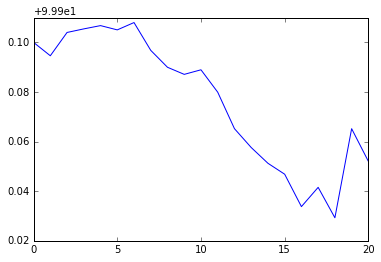

In [4]:
# generate random time series
prices = [100]
for t in range(20):
    prices.append(prices[-1] + 0.01 * np.random.randn())
pd.Series(prices).plot()

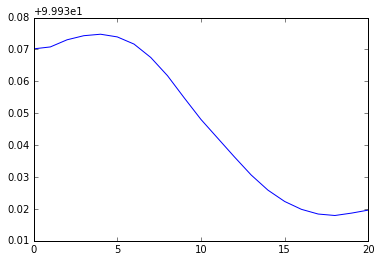

In [11]:
# smooth time series
smoothed_prices = pd.Series(savitzky_golay(np.array(prices), 41, 7))
smoothed_prices.plot()

In [21]:
# calculate volatility
print(np.var(prices[-20:]))
print(np.var(smoothed_prices[-20:]))

0.000262249182912
0.00010927200208281282


In [18]:
1e-12 * 100000000000

0.09999999999999999

# hand optimize

In [177]:
fcast_price = 100.0
price = 99.0
fcast_volatility = 1.47569841582
risk_aversion = 0.04
current_stocks = 0.315705354714

In [178]:
#fcast_price = 18000000000000000000000000000000.0

In [179]:
np.divide(np.log(fcast_price / price), risk_aversion * fcast_volatility * price) - current_stocks

-0.31398551577390144

In [174]:
def optimal_current_price(price):
    price = abs(price)
    stocks = np.divide(np.log(fcast_price / price), risk_aversion * fcast_volatility * price) - current_stocks 
    return stocks

In [175]:
float(scipy.optimize.broyden1(optimal_current_price, 15, line_search='wolfe'))

44.02469078233753

In [182]:
np.divide(np.log(fcast_price / price), risk_aversion * fcast_volatility * price)

0.0017198389400986105